In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import joblib
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [2]:
cwd = os.getcwd()
cwd

'C:\\Users\\abhir\\OneDrive - Oklahoma A and M System\\Oklahoma State University\\GRA\\Publications\\Thesis related papers\\Remote sensing paper\\Analysis'

In [3]:
#read excel using pandas
ls_df = pd.read_csv(cwd + r"\rs_r1.csv")

In [4]:
ls_df.head()

,Reservoir,Site ID,Lat,Long,Sampling Date,Chlo-a,Turbidity,B1,B2,B3,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
0,Grand,Grand,36.68269,-94.77281,6/18/2013,6.8,38.6,8428.0,8775.0,9543.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
1,Grand,Grand,36.68269,-94.77281,6/18/2013,7.8,40.3,8428.0,8775.0,9543.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
2,Grand,Grand,36.68269,-94.77281,6/18/2013,7.0,41.5,8428.0,8775.0,9543.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
3,Grand,Grand,36.68269,-94.77281,6/18/2013,6.5,42.4,8428.0,8775.0,9543.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
4,Grand,Elk,36.64998,-94.70839,6/18/2013,7.1,5.1,7506.0,8101.0,9326.0,...,5345.0,19.0,1759.0,9880.0,0.0,594.0,9174.0,3964.0,21952.0,0.0


In [5]:
#Gives info about entire dataframe
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Reservoir      1709 non-null   object 
 1   Site ID        1709 non-null   object 
 2   Lat            1709 non-null   float64
 3   Long           1709 non-null   float64
 4   Sampling Date  1709 non-null   object 
 5   Chlo-a         1709 non-null   float64
 6   Turbidity      1709 non-null   float64
 7   B1             1709 non-null   float64
 8   B2             1709 non-null   float64
 9   B3             1709 non-null   float64
 10  B4             1709 non-null   float64
 11  B5             1709 non-null   float64
 12  B6             1709 non-null   float64
 13  B7             1709 non-null   float64
 14  B8             1709 non-null   float64
 15  B9             1709 non-null   float64
 16  B10            1709 non-null   float64
 17  B11            1709 non-null   float64
 18  B12     

In [6]:
#checking the null values in the dataframe
ls_df.isnull().sum()

Reservoir        1
Site ID          1
Lat              1
Long             1
Sampling Date    1
Chlo-a           1
Turbidity        1
B1               1
B2               1
B3               1
B4               1
B5               1
B6               1
B7               1
B8               1
B9               1
B10              1
B11              1
B12              1
B13              1
B14              1
B15              1
B16              1
B17              1
B18              1
B19              1
dtype: int64

In [7]:
# #Drop null values if there are any
ls_df = ls_df.dropna()
# #After dropping null values checking the dataframe again
ls_df.isnull().sum()

Reservoir        0
Site ID          0
Lat              0
Long             0
Sampling Date    0
Chlo-a           0
Turbidity        0
B1               0
B2               0
B3               0
B4               0
B5               0
B6               0
B7               0
B8               0
B9               0
B10              0
B11              0
B12              0
B13              0
B14              0
B15              0
B16              0
B17              0
B18              0
B19              0
dtype: int64

In [8]:
ls_df.head()

,Reservoir,Site ID,Lat,Long,Sampling Date,Chlo-a,Turbidity,B1,B2,B3,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
0,Grand,Grand,36.68269,-94.77281,6/18/2013,6.8,38.6,8428.0,8775.0,9543.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
1,Grand,Grand,36.68269,-94.77281,6/18/2013,7.8,40.3,8428.0,8775.0,9543.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
2,Grand,Grand,36.68269,-94.77281,6/18/2013,7.0,41.5,8428.0,8775.0,9543.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
3,Grand,Grand,36.68269,-94.77281,6/18/2013,6.5,42.4,8428.0,8775.0,9543.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
4,Grand,Elk,36.64998,-94.70839,6/18/2013,7.1,5.1,7506.0,8101.0,9326.0,...,5345.0,19.0,1759.0,9880.0,0.0,594.0,9174.0,3964.0,21952.0,0.0


In [9]:
#creating a new dataframe to drop columns
dc = pd.DataFrame()

#dropped unnencessary columns for regression
dc = ls_df.drop(columns = ["Reservoir","Site ID", "Lat", "Long", "Sampling Date"], axis = 1)

dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709 entries, 0 to 1708
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chlo-a     1709 non-null   float64
 1   Turbidity  1709 non-null   float64
 2   B1         1709 non-null   float64
 3   B2         1709 non-null   float64
 4   B3         1709 non-null   float64
 5   B4         1709 non-null   float64
 6   B5         1709 non-null   float64
 7   B6         1709 non-null   float64
 8   B7         1709 non-null   float64
 9   B8         1709 non-null   float64
 10  B9         1709 non-null   float64
 11  B10        1709 non-null   float64
 12  B11        1709 non-null   float64
 13  B12        1709 non-null   float64
 14  B13        1709 non-null   float64
 15  B14        1709 non-null   float64
 16  B15        1709 non-null   float64
 17  B16        1709 non-null   float64
 18  B17        1709 non-null   float64
 19  B18        1709 non-null   float64
 20  B19     

In [10]:
dc.describe()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
count,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,...,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.0
mean,11.998479,225.241837,7694.333528,7957.821533,8573.794617,8276.135167,8208.046226,7880.773552,7739.715623,140.767700,...,6754.482738,134.345231,1218.716208,9884.019895,47.661205,424.248098,8957.166179,2632.590989,22146.795787,0.0
std,11.110827,1373.879645,1632.167074,1590.531252,1550.208991,1619.131227,1967.960432,1665.077643,1393.783856,55.844175,...,1280.858079,205.756738,500.541376,40.928690,49.829221,127.775227,625.882437,1166.228997,2137.531926,0.0
min,-99.900000,-999.900000,0.000000,2724.000000,6543.000000,6244.000000,6517.000000,7237.000000,7293.000000,64.000000,...,4840.000000,0.000000,158.000000,9606.000000,0.000000,205.000000,7042.000000,275.000000,21824.000000,0.0
25%,5.200000,1.000000,7320.000000,7560.000000,8076.000000,7744.000000,7572.000000,7442.000000,7405.000000,96.000000,...,6100.000000,20.000000,649.000000,9880.000000,0.000000,355.000000,8491.000000,1291.000000,21952.000000,0.0
50%,10.100000,3.000000,7730.000000,7875.000000,8324.000000,7990.000000,7796.000000,7571.000000,7475.000000,128.000000,...,6362.000000,57.000000,1408.000000,9880.000000,68.000000,399.000000,9230.000000,3028.000000,21952.000000,0.0
75%,17.800000,8.600000,7974.000000,8133.000000,8723.000000,8373.000000,8311.000000,7846.000000,7718.000000,164.000000,...,8223.000000,127.000000,1460.000000,9904.000000,84.000000,531.000000,9431.000000,3187.000000,21952.000000,0.0
max,122.200000,9999.900000,24862.000000,25624.000000,26077.000000,26249.000000,28975.000000,26735.000000,23742.000000,228.000000,...,9492.000000,1267.000000,1920.000000,9904.000000,139.000000,712.000000,9756.000000,4364.000000,55052.000000,0.0


In [11]:
dc = dc.where(dc["Chlo-a"] > 0)
dc = dc.where(dc["B1"] < 15000)
dc = dc.where(dc["B2"] < 10000)
dc.head()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
0,6.8,38.6,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
1,7.8,40.3,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
2,7.0,41.5,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
3,6.5,42.4,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
4,7.1,5.1,7506.0,8101.0,9326.0,8949.0,9330.0,8644.0,8249.0,224.0,...,5345.0,19.0,1759.0,9880.0,0.0,594.0,9174.0,3964.0,21952.0,0.0


In [12]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709 entries, 0 to 1708
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chlo-a     1524 non-null   float64
 1   Turbidity  1524 non-null   float64
 2   B1         1524 non-null   float64
 3   B2         1524 non-null   float64
 4   B3         1524 non-null   float64
 5   B4         1524 non-null   float64
 6   B5         1524 non-null   float64
 7   B6         1524 non-null   float64
 8   B7         1524 non-null   float64
 9   B8         1524 non-null   float64
 10  B9         1524 non-null   float64
 11  B10        1524 non-null   float64
 12  B11        1524 non-null   float64
 13  B12        1524 non-null   float64
 14  B13        1524 non-null   float64
 15  B14        1524 non-null   float64
 16  B15        1524 non-null   float64
 17  B16        1524 non-null   float64
 18  B17        1524 non-null   float64
 19  B18        1524 non-null   float64
 20  B19     

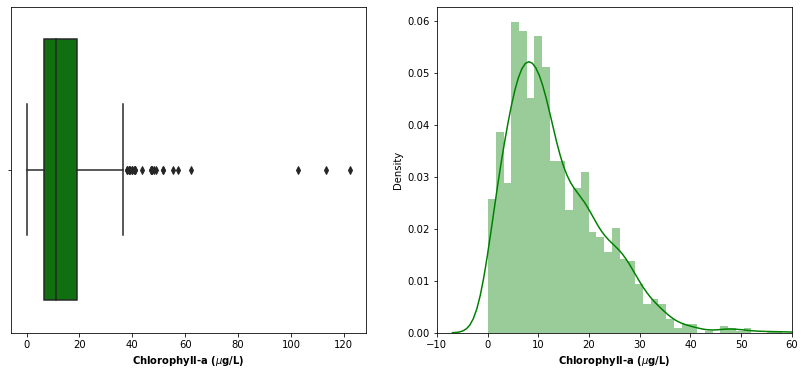

In [13]:
#chlorphyll distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
ax1 = sns.boxplot(dc["Chlo-a"], color = "g")
plt.subplot(122)
ax2 = sns.distplot(dc["Chlo-a"], bins=80, color = 'g')
ax2.set_xlim(-10,60)
ax1.set_xlabel("Chlorophyll-a ($\mu$g/L)", fontweight = "bold")
ax2.set_xlabel("Chlorophyll-a ($\mu$g/L)", fontweight = "bold")
#plt.savefig("algae_dist.tif", dpi = 300)
plt.show()

In [14]:
#checking the null values in the dataframe
dc.isnull().sum()

Chlo-a       185
Turbidity    185
B1           185
B2           185
B3           185
B4           185
B5           185
B6           185
B7           185
B8           185
B9           185
B10          185
B11          185
B12          185
B13          185
B14          185
B15          185
B16          185
B17          185
B18          185
B19          185
dtype: int64

In [15]:
dc = dc.dropna()
dc.head()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
0,6.8,38.6,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
1,7.8,40.3,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
2,7.0,41.5,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
3,6.5,42.4,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
4,7.1,5.1,7506.0,8101.0,9326.0,8949.0,9330.0,8644.0,8249.0,224.0,...,5345.0,19.0,1759.0,9880.0,0.0,594.0,9174.0,3964.0,21952.0,0.0


mu=2.3193112524882302, sigma=0.8421691306448953


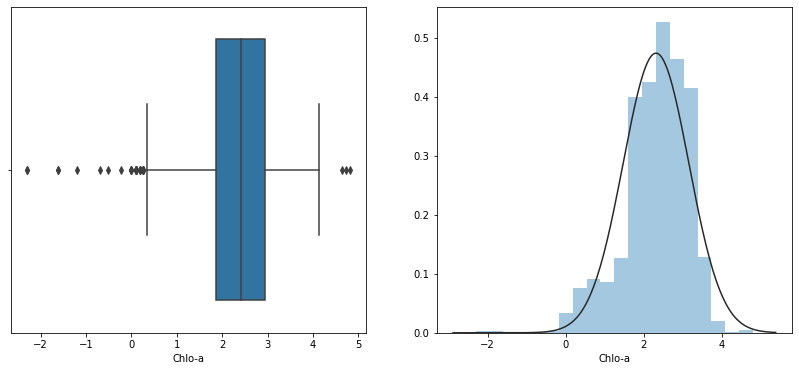

In [16]:
#chlorphyll distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.boxplot(np.log(dc["Chlo-a"]))
plt.subplot(122)
sns.distplot((np.log(dc["Chlo-a"])), bins = 20, fit=stats.norm, kde=False)
# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(np.log(dc["Chlo-a"]))
print("mu={0}, sigma={1}".format(mu, sigma))
plt.show()

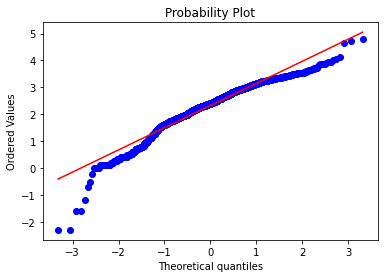

In [17]:
import scipy.stats as stats
stats.probplot(np.log(dc["Chlo-a"]), dist="norm", plot=plt)
plt.show()

In [18]:
from scipy.stats import norm
my_data = norm.rvs(size=500)
stats.shapiro(np.log(dc["Chlo-a"]))

ShapiroResult(statistic=0.9510468244552612, pvalue=3.8612620852455294e-22)

In [19]:
df = dc.copy()
df["Chlo-a"] = np.log(dc["Chlo-a"])
df.isnull().sum()

Chlo-a       0
Turbidity    0
B1           0
B2           0
B3           0
B4           0
B5           0
B6           0
B7           0
B8           0
B9           0
B10          0
B11          0
B12          0
B13          0
B14          0
B15          0
B16          0
B17          0
B18          0
B19          0
dtype: int64

array([[<AxesSubplot:title={'center':'Chlo-a'}>,
        <AxesSubplot:title={'center':'Turbidity'}>,
        <AxesSubplot:title={'center':'B1'}>,
        <AxesSubplot:title={'center':'B2'}>,
        <AxesSubplot:title={'center':'B3'}>],
       [<AxesSubplot:title={'center':'B4'}>,
        <AxesSubplot:title={'center':'B5'}>,
        <AxesSubplot:title={'center':'B6'}>,
        <AxesSubplot:title={'center':'B7'}>,
        <AxesSubplot:title={'center':'B8'}>],
       [<AxesSubplot:title={'center':'B9'}>,
        <AxesSubplot:title={'center':'B10'}>,
        <AxesSubplot:title={'center':'B11'}>,
        <AxesSubplot:title={'center':'B12'}>,
        <AxesSubplot:title={'center':'B13'}>],
       [<AxesSubplot:title={'center':'B14'}>,
        <AxesSubplot:title={'center':'B15'}>,
        <AxesSubplot:title={'center':'B16'}>,
        <AxesSubplot:title={'center':'B17'}>,
        <AxesSubplot:title={'center':'B18'}>],
       [<AxesSubplot:title={'center':'B19'}>, <AxesSubplot:>,
        <AxesS

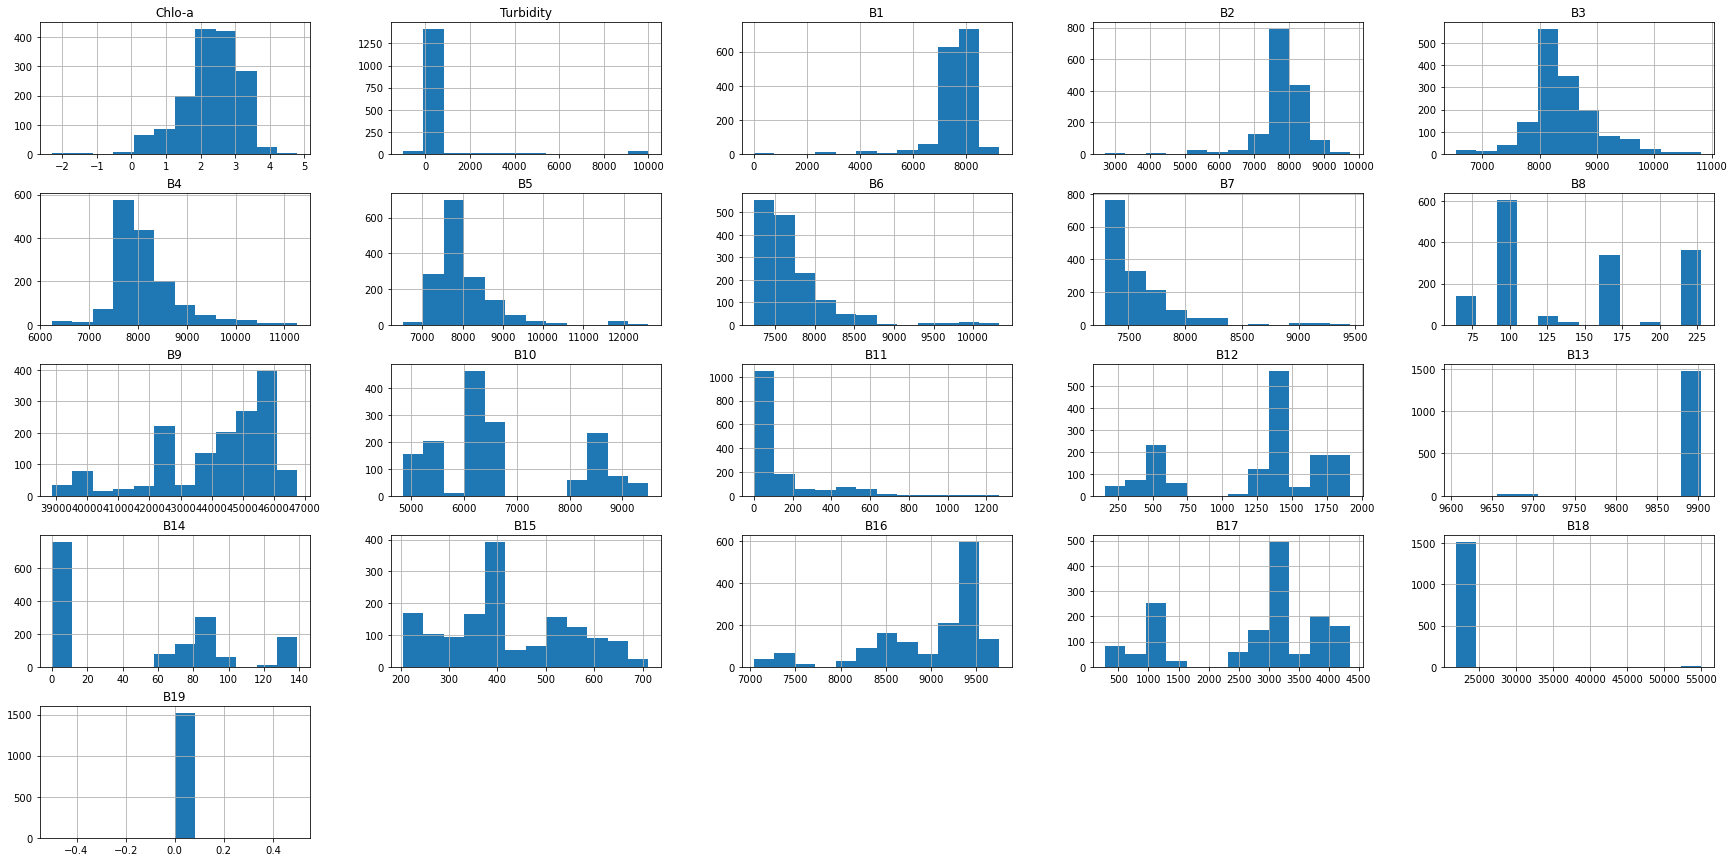

In [20]:
df.hist(figsize = (30,15), bins = 12)

In [21]:
df.describe()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,...,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.0
mean,2.319311,250.386089,7568.284121,7820.062992,8423.098425,8123.659449,8033.683727,7720.795932,7604.844488,140.993438,...,6699.150919,138.913386,1241.766404,9885.351706,47.386483,419.730315,8978.311680,2688.368766,22151.293963,0.0
std,0.842446,1451.285527,832.625412,660.477684,585.490930,677.601741,789.340821,466.219307,334.269095,55.844145,...,1293.081265,208.163859,505.698563,38.229132,49.940775,127.603596,632.661408,1178.172870,2257.986037,0.0
min,-2.302585,-999.900000,0.000000,2724.000000,6543.000000,6244.000000,6517.000000,7237.000000,7293.000000,64.000000,...,4840.000000,0.000000,158.000000,9606.000000,0.000000,205.000000,7042.000000,275.000000,21824.000000,0.0
25%,1.871802,1.400000,7320.750000,7560.000000,8073.000000,7732.000000,7572.000000,7442.000000,7405.000000,96.000000,...,6081.750000,25.000000,649.000000,9880.000000,0.000000,347.000000,8526.000000,1291.000000,21952.000000,0.0
50%,2.406945,3.500000,7702.000000,7875.000000,8315.000000,7976.000000,7807.000000,7571.000000,7471.000000,128.000000,...,6348.000000,57.000000,1411.000000,9880.000000,61.000000,397.000000,9259.000000,3036.000000,21952.000000,0.0
75%,2.939162,9.525000,7945.000000,8102.000000,8693.000000,8369.000000,8295.250000,7838.000000,7713.000000,164.000000,...,8223.000000,127.000000,1536.000000,9904.000000,84.000000,520.000000,9432.000000,3374.750000,21952.000000,0.0
max,4.805659,9999.900000,9242.000000,9748.000000,10823.000000,11265.000000,12616.000000,10330.000000,9457.000000,228.000000,...,9492.000000,1267.000000,1920.000000,9904.000000,139.000000,712.000000,9756.000000,4364.000000,55052.000000,0.0


In [22]:
df.isnull().sum()

Chlo-a       0
Turbidity    0
B1           0
B2           0
B3           0
B4           0
B5           0
B6           0
B7           0
B8           0
B9           0
B10          0
B11          0
B12          0
B13          0
B14          0
B15          0
B16          0
B17          0
B18          0
B19          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 1708
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chlo-a     1524 non-null   float64
 1   Turbidity  1524 non-null   float64
 2   B1         1524 non-null   float64
 3   B2         1524 non-null   float64
 4   B3         1524 non-null   float64
 5   B4         1524 non-null   float64
 6   B5         1524 non-null   float64
 7   B6         1524 non-null   float64
 8   B7         1524 non-null   float64
 9   B8         1524 non-null   float64
 10  B9         1524 non-null   float64
 11  B10        1524 non-null   float64
 12  B11        1524 non-null   float64
 13  B12        1524 non-null   float64
 14  B13        1524 non-null   float64
 15  B14        1524 non-null   float64
 16  B15        1524 non-null   float64
 17  B16        1524 non-null   float64
 18  B17        1524 non-null   float64
 19  B18        1524 non-null   float64
 20  B19     

In [24]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
Chlo-a,1.00,0.03,0.04,-0.03,-0.11,-0.15,0.02,-0.06,-0.07,0.08,0.49,-0.53,-0.11,0.51,0.04,-0.04,0.25,0.45,0.50,-0.03,nan
Turbidity,0.03,1.00,0.06,0.04,-0.03,-0.04,0.02,0.01,-0.01,-0.17,0.11,-0.16,-0.06,0.15,0.06,0.12,0.08,0.09,0.16,-0.01,nan
B1,0.04,0.06,1.00,0.96,0.48,0.44,0.34,0.16,0.10,-0.46,0.10,-0.15,0.05,0.16,-0.10,0.12,-0.08,0.10,0.16,-0.02,nan
B2,-0.03,0.04,0.96,1.00,0.71,0.66,0.51,0.35,0.30,-0.36,-0.00,-0.09,0.03,0.10,-0.22,0.07,-0.02,0.01,0.11,0.05,nan
B3,-0.11,-0.03,0.48,0.71,1.00,0.97,0.67,0.61,0.61,0.03,-0.22,0.09,-0.01,-0.07,-0.43,-0.10,0.16,-0.20,-0.06,0.09,nan
B4,-0.15,-0.04,0.44,0.66,0.97,1.00,0.65,0.59,0.59,0.01,-0.26,0.13,-0.01,-0.12,-0.46,-0.07,0.15,-0.24,-0.11,0.06,nan
B5,0.02,0.02,0.34,0.51,0.67,0.65,1.00,0.94,0.90,0.16,0.19,-0.37,-0.11,0.40,-0.54,0.14,0.33,0.23,0.40,0.39,nan
B6,-0.06,0.01,0.16,0.35,0.61,0.59,0.94,1.00,0.99,0.21,0.11,-0.29,-0.08,0.32,-0.54,0.14,0.33,0.17,0.32,0.39,nan
B7,-0.07,-0.01,0.10,0.30,0.61,0.59,0.90,0.99,1.00,0.26,0.08,-0.24,-0.05,0.27,-0.54,0.11,0.32,0.14,0.28,0.39,nan
B8,0.08,-0.17,-0.46,-0.36,0.03,0.01,0.16,0.21,0.26,1.00,-0.02,-0.09,-0.08,0.09,-0.25,-0.29,0.21,-0.01,0.09,0.13,nan


In [25]:
#drop the columns of the dependent variables to have independent variables
X = df.drop(columns = ["Chlo-a", "Turbidity"])
y = df[["Chlo-a"]]
#Y = dc[["Turbidity"]]

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 1708
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B1      1524 non-null   float64
 1   B2      1524 non-null   float64
 2   B3      1524 non-null   float64
 3   B4      1524 non-null   float64
 4   B5      1524 non-null   float64
 5   B6      1524 non-null   float64
 6   B7      1524 non-null   float64
 7   B8      1524 non-null   float64
 8   B9      1524 non-null   float64
 9   B10     1524 non-null   float64
 10  B11     1524 non-null   float64
 11  B12     1524 non-null   float64
 12  B13     1524 non-null   float64
 13  B14     1524 non-null   float64
 14  B15     1524 non-null   float64
 15  B16     1524 non-null   float64
 16  B17     1524 non-null   float64
 17  B18     1524 non-null   float64
 18  B19     1524 non-null   float64
dtypes: float64(19)
memory usage: 238.1 KB


In [27]:
rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
rf.fit(X,y)

RandomForestRegressor(n_estimators=300, random_state=42)

In [28]:
rf.feature_importances_

array([0.01153817, 0.02417284, 0.0567168 , 0.08656621, 0.0131664 ,
       0.03045996, 0.01635202, 0.00494754, 0.36850338, 0.06244474,
       0.02511713, 0.03194017, 0.00111685, 0.00613339, 0.05057753,
       0.1692482 , 0.03794934, 0.00304932, 0.        ])

Text(0.5, 0, 'Random Forest Feature Importance')

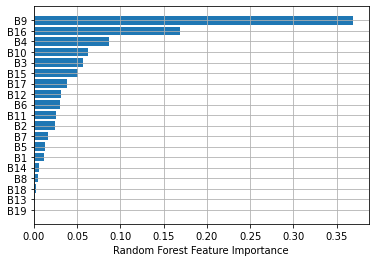

In [29]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.grid()
plt.xlabel("Random Forest Feature Importance")

In [30]:
#drop the columns of the dependent variables to have independent variables
X = df.drop(columns = ["Chlo-a", "Turbidity", "B8", "B11", "B14", "B15", "B18", "B13", "B19", "B7", "B1", "B10",
                      "B12", "B16", "B17"])
y = df[["Chlo-a"]]
#Y = dc[["Turbidity"]]

In [31]:
corr1 = X.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,B2,B3,B4,B5,B6,B9
B2,1.00,0.71,0.66,0.51,0.35,-0.00
B3,0.71,1.00,0.97,0.67,0.61,-0.22
B4,0.66,0.97,1.00,0.65,0.59,-0.26
B5,0.51,0.67,0.65,1.00,0.94,0.19
B6,0.35,0.61,0.59,0.94,1.00,0.11
B9,-0.00,-0.22,-0.26,0.19,0.11,1.00


In [32]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 1708
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B2      1524 non-null   float64
 1   B3      1524 non-null   float64
 2   B4      1524 non-null   float64
 3   B5      1524 non-null   float64
 4   B6      1524 non-null   float64
 5   B9      1524 non-null   float64
dtypes: float64(6)
memory usage: 83.3 KB


In [34]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 1708
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chlo-a  1524 non-null   float64
dtypes: float64(1)
memory usage: 23.8 KB


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [36]:
#calling the model and fitting the data points
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
#import joblib
#joblib.dump(lm, "lm_chl_joblib")

In [38]:
# load, no need to initialize the loaded_rf
loaded_lm = joblib.load("lm_chl_joblib")

In [39]:
y_pred = loaded_lm.predict(X_test)

In [40]:
#To retrieve the intercept:
print(loaded_lm.intercept_)
#For retrieving the slope:
print(loaded_lm.coef_)

[2.33231286]
[[-0.16052763  0.49057578 -0.35284233  0.41284405 -0.51834092  0.41705139]]


In [41]:
print(max(y_pred))

[3.33537116]


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 value is:', r2_score(y_test,y_pred))

Mean Absolute Error: 0.5411920556623782
Mean Squared Error: 0.4712963955724431
Root Mean Squared Error: 0.6865103025974506
R^2 value is: 0.298371315874877


In [43]:
y_pred_train = lm.predict(X_train)

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R^2 value is:', r2_score(y_train,y_pred_train))

Mean Absolute Error: 0.5426775739510872
Mean Squared Error: 0.5126592908252438
Root Mean Squared Error: 0.7160022980586331
R^2 value is: 0.29051573914933104


In [45]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [46]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,2.151762,2.595258
1,3.005683,2.948076
2,1.629241,1.975096
3,3.941582,1.539144
4,2.850707,2.593000
...,...,...
453,1.945910,1.463691
454,2.292535,2.352331
455,0.916291,1.651707
456,1.667707,1.780638


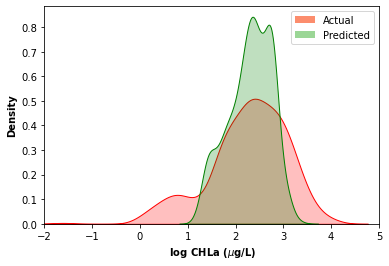

In [47]:
ax = sns.kdeplot(df["Actual"], shade=True, color="r")
ay = sns.kdeplot(df["Predicted"], shade=True, color="g")
ax.set_xlim(-5,35)
ax.set_xlabel(" log CHLa ($\mu$g/L)", fontweight = 'bold')
ax.set_ylabel("Density", fontweight = 'bold')
ax.set_xlim(-2,5)
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Actual"),
           mpatches.Patch(facecolor=plt.cm.Greens(100), label="Predicted")]
plt.legend(handles=handles)
#plt.savefig("chl_mod.tif", dpi = 300)
plt.show()

In [48]:
#cls = RandomForestRegressor(n_estimators = 300, random_state = 42)   

#cls.fit(X_train, y_train)#We are training the model with RBF'ed data

In [49]:
#save
#joblib.dump(cls, "chl_joblib")

In [50]:
X_train.shape

(1066, 6)

In [51]:
X_train

,B2,B3,B4,B5,B6,B9
1525,0.596638,1.089873,1.280435,-0.497646,-0.731218,-2.267961
126,0.225573,0.162142,-0.009831,1.535096,1.066810,-0.050604
330,-0.048561,-0.039464,-0.185508,-0.588892,-0.456579,-1.041602
293,0.320990,0.286865,0.072840,-0.531863,-0.527384,-1.076071
1199,0.801103,0.508973,0.409432,0.916656,0.474619,-0.108772
...,...,...,...,...,...,...
1279,0.944985,0.678118,0.658923,0.897646,1.219149,0.247772
1448,0.519396,0.512391,0.388764,0.988891,1.011024,1.231229
905,-0.289375,-0.697248,-0.712539,-0.467231,-0.604626,0.855297
1619,0.187709,0.573898,0.534915,-0.960209,-0.883557,-2.319127


In [52]:
X_test.shape

(458, 6)

In [53]:
loaded_rf = joblib.load("chl_joblib")

In [54]:
rf_pred = loaded_rf.predict(X_test)
#rf_pred

In [55]:
mse = metrics.mean_squared_error(y_test, rf_pred)
print(mse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R^2 value is:', r2_score(y_test,rf_pred))

0.1662684604448681
Root Mean Squared Error: 0.4077602977790605
R^2 value is: 0.7524727067523027


In [58]:
rf_pred_train = loaded_rf.predict(X_train)
rf_pred_train

array([1.76758192, 4.32407655, 1.396022  , ..., 3.20397321, 1.55831323,
       2.33927344])

In [59]:
mse = metrics.mean_squared_error(y_train, rf_pred_train)
print(mse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, rf_pred_train)))
print('R^2 value is:', r2_score(y_train,rf_pred_train))

0.13126905211996354
Root Mean Squared Error: 0.36231071212422566
R^2 value is: 0.8183329004610828


In [ ]:
# # #create a max_depth parameter
# max_depth =  [7,8,9,10,11]
# max_features = [2,3,4,5,6]
# min_samples_split = [2,4,5,10]
# min_samples_leaf = [1,5,10,15]

# # #create a random grid for random search
# random_grid = {'max_depth' : max_depth,
# 'max_features': max_features,
# 'min_samples_split': min_samples_split,
# 'min_samples_leaf': min_samples_leaf}

# rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
# random_search = RandomizedSearchCV(rf, param_distributions = random_grid, n_iter = 50, cv = 3)
# random_search.fit(X_train, y_train)

# RF = random_search.best_estimator_

# RF.fit(X_train, y_train)

# #predicting a result for test
# y_pred = RF.predict(X_test)

# #predicting a result for train
# y_pred_train = RF.predict(X_train)

In [ ]:
# def rmse(score):
#     rmse = np.sqrt(-score)
#     print(f'rmse= {"{:.2f}".format(rmse)}')

<AxesSubplot:title={'center':'Max_Depth Learning Curve'}, xlabel='max_depth'>

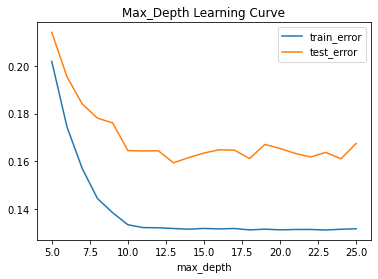

In [60]:
#Hyper paarmeter tuning
#Manually search for best max_depth
# Create empty array to store results
results = []
# Enumerate through different max_depth values and store results
for max_depth in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
    RF = RandomForestRegressor(max_depth = max_depth,n_jobs = -1)
    RF.fit(X_train,y_train)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(y_train, RF.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, RF.predict(X_test))
        })

# Display Results
max_depth_lr = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lr

# Plot Max_Depth Learning Curve
max_depth_lr.plot(title="Max_Depth Learning Curve")

<AxesSubplot:title={'center':'max_features Learning Curve'}, xlabel='max_features'>

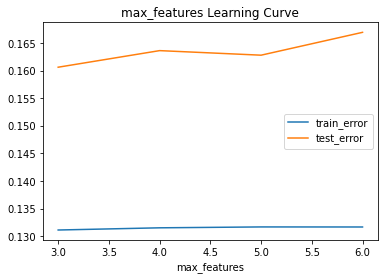

In [61]:
#Manually search for best max_features
results = []
for max_features in [3,4,5,6]:
    RF = RandomForestRegressor(max_features = max_features, max_depth  =16,n_jobs = -1)
    RF.fit(X_train,y_train)
    results.append(
        {
            'max_features': max_features,
            'train_error': metrics.mean_squared_error(y_train, RF.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, RF.predict(X_test))
        })

max_features_df = pd.DataFrame(results).set_index('max_features').sort_index()
max_features_df
max_features_df.plot(title="max_features Learning Curve")

<AxesSubplot:title={'center':'min_samples_split-Learning Curve'}, xlabel='min_samples_split'>

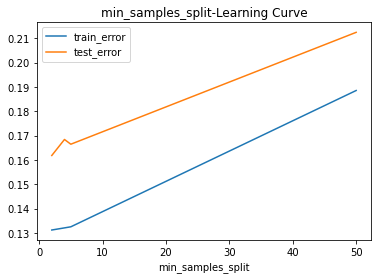

In [62]:
#For Best min_samples_split Parameter

results = []
for min_samples_split in [2,4,5,50]:
    RF = RandomForestRegressor(min_samples_split = min_samples_split, n_estimators = 300, max_depth  =16,max_features = 6,
                               n_jobs = -1 )
    RF.fit(X_train,y_train)
    results.append(
        {
            'min_samples_split': min_samples_split,
            'train_error': metrics.mean_squared_error(y_train, RF.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, RF.predict(X_test))
        })

min_samples_split_df = pd.DataFrame(results).set_index('min_samples_split').sort_index()
min_samples_split_df
min_samples_split_df.plot(title="min_samples_split-Learning Curve")

In [63]:
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 value is:', r2_score(y_test,y_pred))

MSE 0.4712963955724431
RMSE 0.6865103025974506
R^2 value is: 0.298371315874877


In [64]:
print(mean_squared_error(y_train,y_pred_train))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print('R^2 value is:', r2_score(y_train,y_pred_train))

0.5126592908252438
RMSE 0.7160022980586331
R^2 value is: 0.29051573914933104


In [65]:
loaded_rf.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=1608637542)

In [66]:
feature_list = list(X.columns)
feature_list

['B2', 'B3', 'B4', 'B5', 'B6', 'B9']

In [67]:
target = list(y.columns)
target

['Chlo-a']

In [68]:
fn = feature_list
cn = target

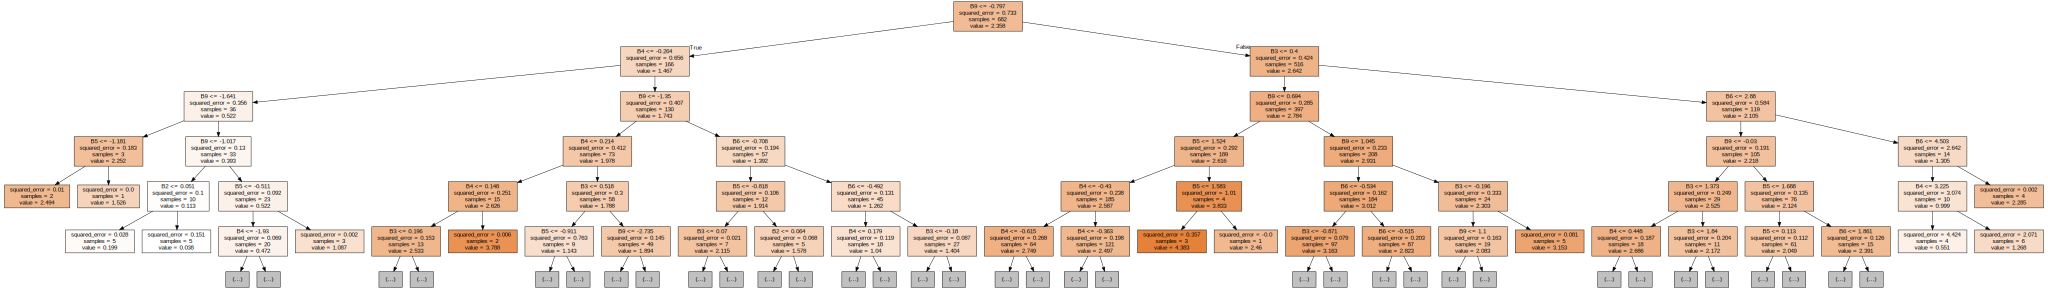

In [69]:
from sklearn import tree
import graphviz
# DOT data
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,10), dpi=300)
dot_data = tree.export_graphviz(loaded_rf.estimators_[1], 
                                out_file=None, 
                                feature_names= fn,  
                                class_names=cn,
                                max_depth=5,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="tif") 
graph

In [70]:
#graph.render("chl_main")

In [71]:
y_test = y_test.flatten()
y_pred = y_pred.flatten()


In [72]:
dpf = pd.DataFrame({'test': y_test, 'pred': y_pred})

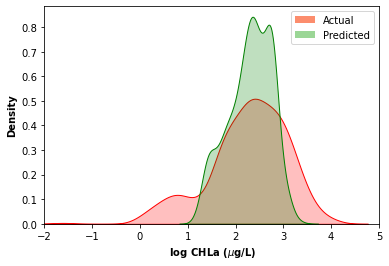

In [73]:
ax = sns.kdeplot(dpf["test"], shade=True, color="r")
ay = sns.kdeplot(dpf["pred"], shade=True, color="g")
ax.set_xlim(-5,35)
ax.set_xlabel(" log CHLa ($\mu$g/L)", fontweight = 'bold')
ax.set_ylabel("Density", fontweight = 'bold')
ax.set_xlim(-2,5)
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Actual"),
           mpatches.Patch(facecolor=plt.cm.Greens(100), label="Predicted")]
plt.legend(handles=handles)
#plt.savefig("chl_mod.tif", dpi = 300)
plt.show()

In [74]:
#clf = SVR()
#clf.fit(X_train, y_train)

In [75]:
# save
#joblib.dump(clf, "svr_chl_joblib")

In [76]:
# load, no need to initialize the loaded_rf
loaded_svr = joblib.load("svr_chl_joblib")

In [77]:
sv_pred = loaded_svr.predict(X_test)
sv_pred

array([2.96134111, 2.99613179, 1.60380871, 1.88979035, 2.9846736 ,
       2.2606889 , 3.03949583, 2.14118954, 2.12283989, 2.76048239,
       2.08378691, 1.65770965, 0.6529771 , 2.13581889, 2.93636665,
       2.50610972, 3.03340516, 2.1907767 , 2.42539242, 2.19780907,
       0.63048518, 0.93256259, 2.47668515, 2.2606889 , 2.40564295,
       1.9411584 , 2.54226256, 2.90458242, 3.15451853, 2.14770883,
       2.42553186, 1.29123024, 2.54914384, 2.55882561, 3.0361009 ,
       2.99097925, 2.08378691, 2.98192818, 2.80120154, 2.19958638,
       2.82938167, 2.45770223, 2.91773233, 2.42413141, 0.93256259,
       2.49873675, 2.23217248, 2.40033275, 2.51235857, 2.80922228,
       2.49873675, 0.6879799 , 1.19866184, 1.13491767, 1.57549977,
       2.13675535, 2.42539242, 2.96134111, 3.24429678, 2.76048239,
       3.08519563, 1.83713704, 2.38642498, 2.70058625, 0.63048518,
       1.74076729, 2.36362534, 2.89846339, 2.16603002, 2.85578884,
       2.90458242, 0.93256259, 1.29123024, 1.48534356, 1.87506

In [78]:
mse = metrics.mean_squared_error(y_test, sv_pred)
print(np.sqrt(metrics.mean_squared_error(y_test, sv_pred)))
print(mse)
print('R^2 value is:', r2_score(y_test,sv_pred))

0.5260897601072783
0.27677043568973364
R^2 value is: 0.5879661325186695


In [81]:
sv_pred_train = loaded_svr.predict(X_train)
#sv_pred_train

In [82]:
mse = metrics.mean_squared_error(y_train, sv_pred_train)
print(np.sqrt(metrics.mean_squared_error(y_train, sv_pred_train)))
print(mse)
print('R^2 value is:', r2_score(y_train, sv_pred_train))

0.5423368013069483
0.2941292060518523
R^2 value is: 0.592945946586916
